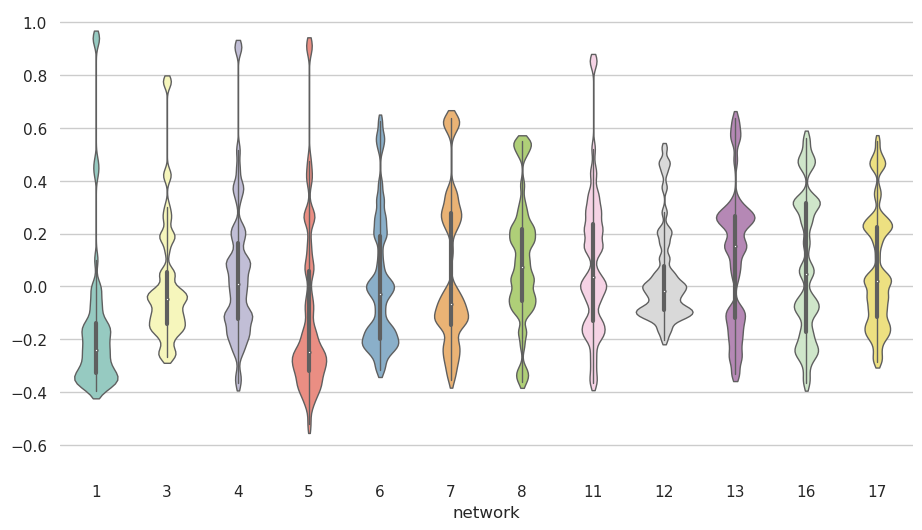

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.1, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

In [2]:
df

network           1                     3                     4             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036  26.203819 -49.715569  47.461037  26.746613   
1         55.547253  43.690075 -28.274963 -39.050129  -1.210660 -19.012897   
2         60.997768  63.438793 -18.842947  -1.214659 -65.575806 -85.777428   
3         18.514868  12.657158  -7.420454  17.119448 -41.800869 -58.610184   
4         -2.527392 -63.104668 -45.216927   3.483550 -62.613335 -49.076508   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219 -19.680431 -29.109356  -3.376562  -8.764893   
916      -33.554138 -38.605621   5.562785  20.182186  17.911247  24.653582   
917      -78.539566 -74.197189 -14.277059 -30.606461  60.628521  62.027023   
918     -103.235825 -98.744286  12.109148   1.621340  33.765560  55.356071   
919      -36.288868 -10.762070  14.252188 -27.559860  17.279512 -19.060152   

network          5                     6             ...          16  \
node             1                     1             ...           3   
hemi            lh         rh         lh         rh  ...          rh   
0       -35.898861  -1.889181   5.898688 -43.692322  ...    0.607904   
1        19.568010  15.902983 -23.231823 -10.745867  ...   57.495071   
2        19.247454  37.209419   2.392153  16.509109  ...   28.317369   
3        32.896915  11.199619 -14.665752   2.073715  ...   71.439629   
4        18.396759   3.219077 -41.856911 -24.690414  ...   95.597565   
..             ...        ...        ...        ...  ...         ...   
915       0.017912 -25.305094 -75.461159 -70.289261  ...   58.285793   
916     -32.935612 -21.783203 -16.198238 -34.893780  ...   59.864819   
917     -32.800556 -37.021500   2.098941 -18.581594  ...   68.767868   
918     -14.330512 -17.224781  -3.007454 -42.672840  ...  103.155251   
919      26.558777  21.377319   9.652065  12.693388  ...  102.086304   

network                                 17                                   \
node              4                      1                     2              
hemi             lh          rh         lh         rh         lh         rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   
..              ...         ...        ...        ...        ...        ...   
915       68.557411   22.833048  76.179489  51.934669  -6.614513  -6.690762   
916       23.004578    7.657463  50.962399  13.696922  63.503616  57.401176   
917       49.664017   64.551498  43.800747   8.144480  47.281460  70.499649   
918      106.454849    9.046827  46.674419  40.954796   0.877180  37.577152   
919       80.051140   -2.642610 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 52 columns]